# 7月5日课程作业

In [18]:
import numpy as np
import vedo as vd
import panel as pn

vdp = vd.Plotter(axes=False, offscreen=True)
from matplotlib.figure import Figure

pn.extension()

def mpl_plot(mesh):
    fig = Figure()
    fig.clear()
    img = vdp.show(mesh).
    fig.add_subplot().imshow(img)
    return fig


def plot3d(mesh):
    import math
    kw = dict(alpha=(-math.pi, +math.pi), beta=(-math.pi, +math.pi), gamma=(-math.pi, +math.pi))
    def view_fn(alpha=0, beta=0, gamma=0):
        mesh.rotateX(angle=alpha)
        mesh.rotateY(angle=beta)
        mesh.rotateZ(angle=gamma)
        return mpl_plot(mesh)

    interact = pn.interact(view_fn, **kw)
    interact.pprint()
    return pn.Row(interact[1][0], pn.Column(interact[0][0], interact[0][1], interact[0][2]))


Column
    [0] Column
        [0] FloatSlider(end=3.141592653589793, name='alpha', start=-3.141592653589793)
        [1] FloatSlider(end=3.141592653589793, name='beta', start=-3.141592653589793)
        [2] FloatSlider(end=3.141592653589793, name='gamma', start=-3.141592653589793)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00207')


Row
    [0] Matplotlib(Figure, name='interactive00207')
    [1] Column
        [0] FloatSlider(end=3.141592653589793, name='alpha', start=-3.141592653589793)
        [1] FloatSlider(end=3.141592653589793, name='beta', start=-3.141592653589793)
        [2] FloatSlider(end=3.141592653589793, name='gamma', start=-3.141592653589793)
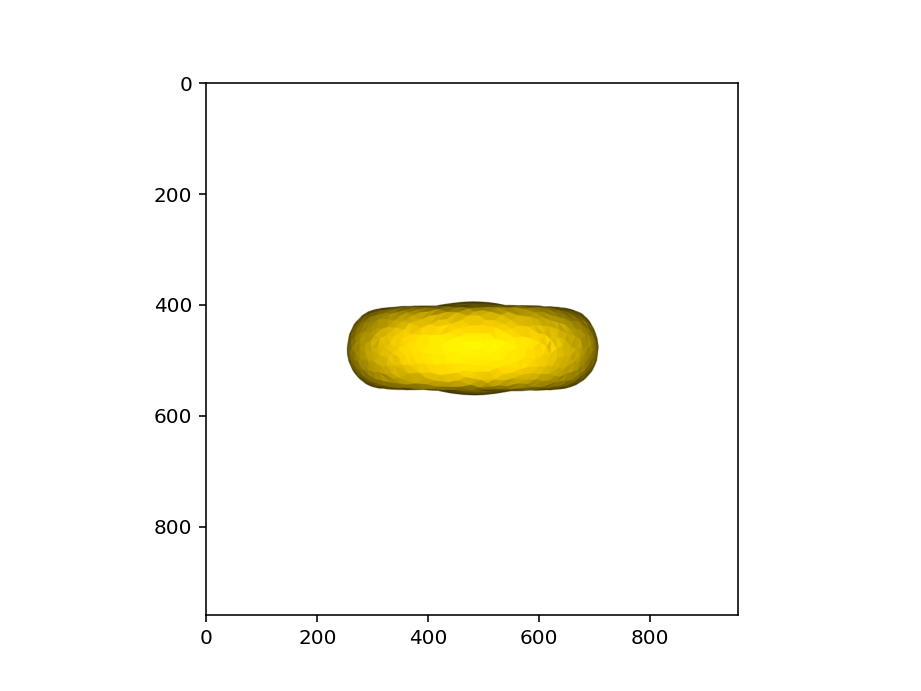

In [19]:
plot3d(vd.load('../../data/eight.vtk'))

mesh 有一定的结构，我们可以看到其中的所有顶点，如下：

In [10]:
mesh.points([1])

NameError: name 'mesh' is not defined

In [ ]:
mesh.points[:, 0].min(), mesh.points[:, 0].max()

In [ ]:
mesh.points[:, 1].min(), mesh.points[:, 1].max()

In [ ]:
mesh.points[:, 2].min(), mesh.points[:, 2].max()

In [ ]:
我们可以给点染色，效果如下

In [ ]:
mesh.point_arrays['pvalues'] = np.linspace(0.0, 1.0, mesh.n_points)
mesh.plot(scalars='pvalues', show_edges=True, screenshot='points_coloring.png')

基于上面的 API，让我们试验一下一个双环面上一个燃烧的过程，火从一点开始向外蔓延，遇到已经燃烧过的就停下蔓延，我们把停止蔓延处的点都记录下来。

初始时刻，只有第 0 点处在着火，其他点全部是未着火的状态。

In [ ]:
mesh.point_arrays['pvalues'] = np.ones([mesh.n_points]) * 0.7 # 绿色的森林
mesh.point_arrays['pvalues'][0] = 0.0                         # 强制把色阶拉回去的 workaround
mesh.point_arrays['pvalues'][5000] = 1.0                      # 着火处
mesh.plot(scalars='pvalues', show_edges=True, screenshot='points_coloring.png')

In [ ]:
def step():
    for i in range(mesh.n_points):
        p = mesh.points[i]
        pval = mesh.point_arrays['pvalues'][i]
        if pval > 0.75:                              # 如果 p 点正在燃烧
            for j in range(mesh.n_points):
                q = mesh.points[j]
                qval = mesh.point_arrays['pvalues'][j]
                d = np.sqrt(np.sum((p - q) * (p - q)))
                meet_cond = False
                if d < 0.05:
                    if qval == 0.7:                  # 如果 q 点尚未燃烧过
                        mesh.point_arrays['pvalues'][j] = 1.0
                        meet_cond = False
                    elif qval > 0.75 or qval == 0.0: # 如果 q 点也在燃烧
                        meet_cond = meet_cond and (pval > qval)

            mesh.point_arrays['pvalues'][i] = mesh.point_arrays['pvalues'][i] * 0.9
            if 0.7 < mesh.point_arrays['pvalues'][i] < 0.75:
                mesh.point_arrays['pvalues'][i] = 0.5

            if meet_cond:
                mesh.point_arrays['pvalues'][i] = 0.0

    mesh.point_arrays['pvalues'][0] = 0.0

In [ ]:
step()